##  Read all data from excel sheet in one data frame 

In [43]:
import os
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import datetime as dt 
dirname ='companies'
files = os.listdir(dirname)
from collections import defaultdict

In [18]:
companies_records = defaultdict(dict)
for file in files:
    file_path = f'companies/{file}'
    xl = pd.read_excel(file_path, sheet_name=None)
    sheets = list(xl.keys())
    for sheet_name in sheets[:3]:
        #sheet_name = sheets[0]
        df = xl[sheet_name]
        df = df.apply(lambda x:x.str.strip())
        df = df.set_index(df.columns[0])
        df.columns=df.loc['Narration']
        df = df.drop('Narration',axis=0)
        df = df.replace('-', None)
        df = df.dropna(how = 'all', axis =1)
        df = df.dropna(how = 'all', axis =0)
        df = df.fillna(0)
        df = df.apply(lambda x : x.str.replace(',',''))
        df = df.apply(lambda x : x.str.replace('%',''))
        df = df.replace('', 0)
        df = df[:-4]
        df = df.fillna(0)
        df = df.astype(float)
        df = df[df.columns.dropna()]
        cols = [c for c in df.columns if c not in ['Trailing','Best Case','Worst Case']]
        df = df[cols]
        df.columns = df.columns.map(lambda x :dt.datetime.strptime(x,'%b-%y'))
        companies_records[file][sheet_name] = df

### Display Collective Data

In [73]:
pd.DataFrame(companies_records)

,One 97.xlsx,Fino Payments.xlsx,Ugro Capital.xlsx,PB Fintech.xlsx,Niyogin Fintech.xlsx
Profit & Loss,Narration 2016-03-01 2017-...,Narration 2018-03-01 2019-03-...,Narration 2014-03-01 2015-03-01 20...,Narration 2015-03-01 2016-03-01 201...,Narration 2020-03-01 2021-03-01 ...
Quarters,Narration 2021-06-01 2021-...,Narration 2021-06-01 2021-09-...,Narration 2021-06-01 2021-09-01 20...,Narration 2021-06-01 2021-09-01 2021...,Narration 2021-06-01 2021-09-01 ...
Balance Sheet,Narration 2016-03-01 2017-...,Narration 2018-03-01 2019-03-...,Narration 2014-03-01 2015-03-...,Narration 2015-03-01 2016-03-01 ...,Narration 2020-03-01 2021-03-...


In [74]:
pd.DataFrame(companies_records)['One 97.xlsx']['Balance Sheet']

Narration,2016-03-01,2017-03-01,2018-03-01,2019-03-01,2020-03-01,2021-03-01,2022-03-01,2023-03-01
ONE 97 COMMUNICATIONS LTD,,,,,,,,
Equity Share Capital,46.23,46.99,55.32,57.53,60.43,60.5,64.9,63.4
Reserves,2770.71,2328.64,7520.23,5978.50,8351.02,6924.0,13647.6,12223.3
Borrowings,14.98,90.27,241.65,722.46,405.09,588.4,204.2,206.6
Other Liabilities,630.19,1422.38,739.07,1924.64,1690.48,1906.7,2439.9,3143.1
Total,3462.11,3888.28,8556.27,8683.13,10507.02,9479.6,16356.6,15636.4
Net Block,77.55,141.21,166.10,286.14,507.63,390.5,830.0,1137.1
Capital Work in Progress,57.50,71.89,19.52,50.80,11.89,22.7,11.2,7.5
Investments,2363.47,971.88,5187.52,3440.38,4211.80,1299.3,1305.3,2493.4
Other Assets,963.59,2703.30,3183.13,4905.81,5775.70,7767.1,14210.1,11998.4


In [50]:
companies_records['One 97.xlsx']['Profit & Loss']

Narration,2016-03-01,2017-03-01,2018-03-01,2019-03-01,2020-03-01,2021-03-01,2022-03-01,2023-03-01
ONE 97 COMMUNICATIONS LTD,,,,,,,,
Sales,449.19,624.76,2982.22,3049.87,3115.10,2667.10,3892.40,6027.70
Expenses,2168.83,2388.87,4685.36,7164.28,5579.79,4343.70,6187.90,7728.60
Operating Profit,-1719.64,-1764.11,-1703.14,-4114.41,-2464.69,-1676.60,-2295.50,-1700.90
Other Income,233.68,931.60,308.32,250.72,-174.77,309.90,238.90,336.40
Depreciation,24.80,39.05,68.92,75.81,143.18,156.80,228.20,469.60
Interest,1.27,4.42,27.74,20.02,50.49,36.40,40.00,21.70
Profit before tax,-1512.03,-875.98,-1491.48,-3959.52,-2833.13,-1559.90,-2324.80,-1855.80
Tax,-1.70,3.65,-1.01,0.12,0.05,0.20,0.30,0.00
Net profit,-1510.33,-879.63,-1490.47,-3959.64,-2833.18,-1560.10,-2325.10,-1855.80


<Axes: xlabel='Narration'>

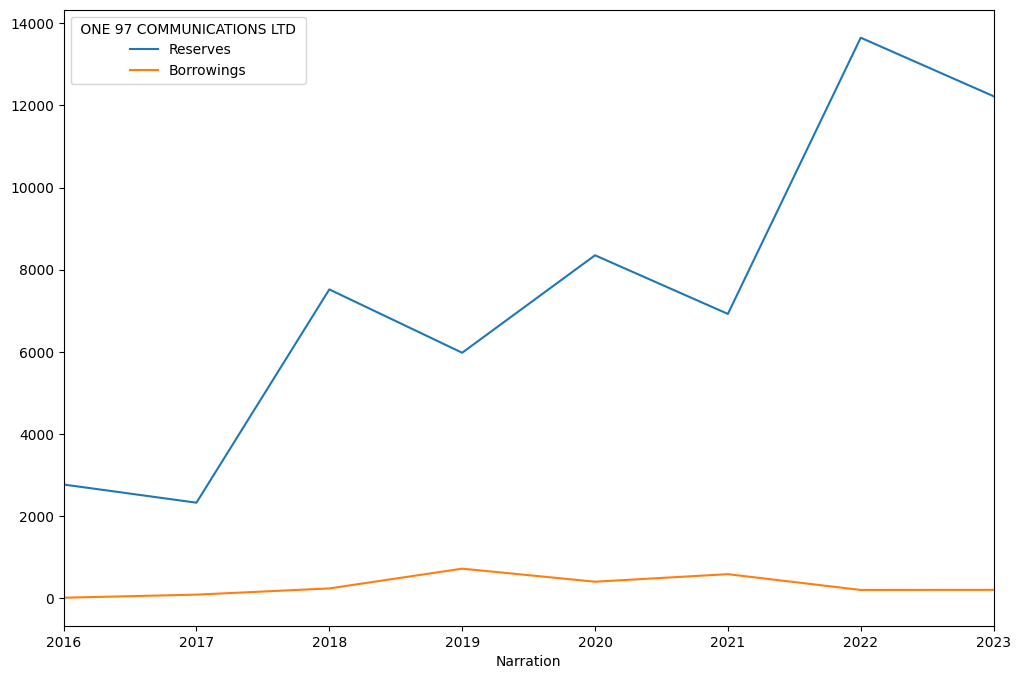

In [64]:
companies_records['One 97.xlsx']['Balance Sheet'].T[['Reserves','Borrowings']].plot()

## Realign Sales Data for all the companies

In [22]:
sales_df = pd.concat([record['Profit & Loss'].loc[['Sales']].assign(company = record['Profit & Loss'].index.name).set_index('company') 
                      for record in companies_records.values()]).fillna(0)

In [23]:
sales_df

Narration,2016-03-01,2017-03-01,2018-03-01,2019-03-01,2020-03-01,2021-03-01,2022-03-01,2023-03-01,2014-03-01,2015-03-01
company,,,,,,,,,,
ONE 97 COMMUNICATIONS LTD,449.19,624.76,2982.22,3049.87,3115.10,2667.10,3892.40,6027.70,0.00,0.00
FINO PAYMENTS BANK LTD,0.00,0.00,15.50,19.15,18.13,20.25,35.63,94.86,0.00,0.00
UGRO CAPITAL LTD,3.78,2.34,3.52,43.94,105.14,153.34,312.11,683.76,5.68,2.37
PB FINTECH LTD,90.04,0.00,333.93,492.25,771.30,886.66,1424.89,2557.85,0.00,77.57
NIYOGIN FINTECH LTD,0.00,0.00,0.00,0.00,27.91,50.15,103.01,109.54,0.00,0.00


In [25]:
expenses_df = pd.concat([record['Profit & Loss'].loc[['Expenses']].assign(company = record['Profit & Loss'].index.name).set_index('company') 
                      for record in companies_records.values()]).fillna(0)

In [26]:
sales_df.T.sort_index()

company,ONE 97 COMMUNICATIONS LTD,FINO PAYMENTS BANK LTD,UGRO CAPITAL LTD,PB FINTECH LTD,NIYOGIN FINTECH LTD
Narration,,,,,
2014-03-01,0.00,0.00,5.68,0.00,0.00
2015-03-01,0.00,0.00,2.37,77.57,0.00
2016-03-01,449.19,0.00,3.78,90.04,0.00
2017-03-01,624.76,0.00,2.34,0.00,0.00
2018-03-01,2982.22,15.50,3.52,333.93,0.00
2019-03-01,3049.87,19.15,43.94,492.25,0.00
2020-03-01,3115.10,18.13,105.14,771.30,27.91
2021-03-01,2667.10,20.25,153.34,886.66,50.15
2022-03-01,3892.40,35.63,312.11,1424.89,103.01


Text(0, 0.5, 'Sales')

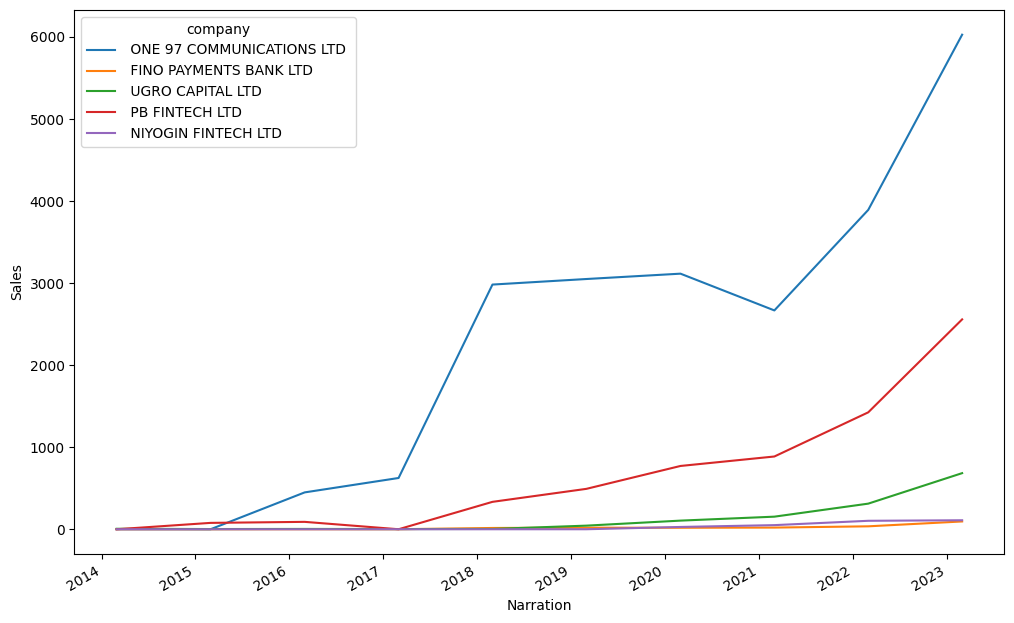

In [53]:
#plt.figure(figsize=(15,8))
plt.rcParams['figure.figsize'] = [12, 8]

sales_df.T.plot()
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

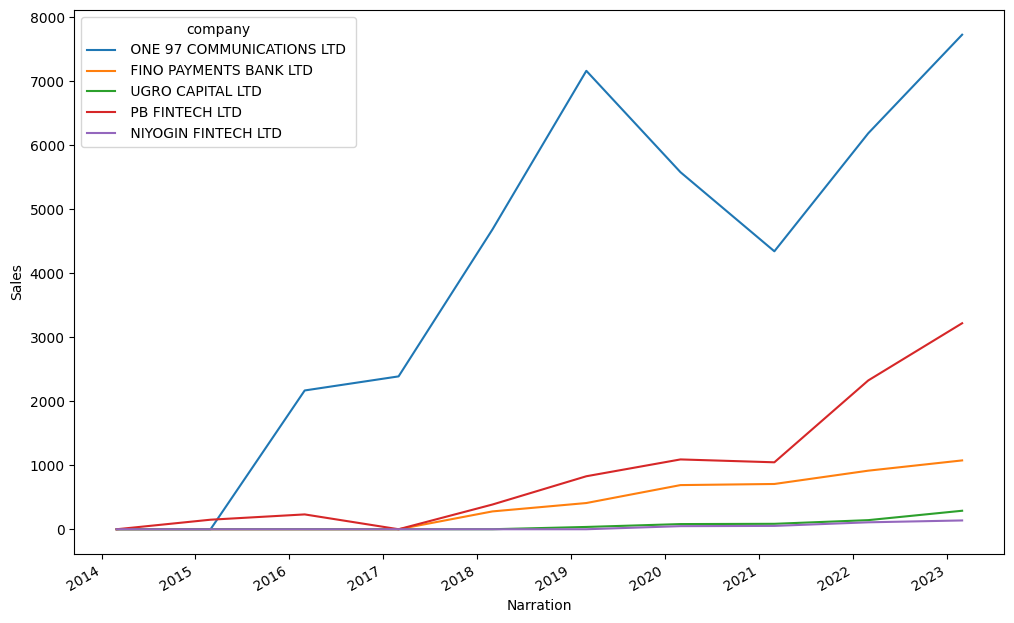

In [54]:
#plt.figure(figsize=(15,8))
plt.rcParams['figure.figsize'] = [12, 8]

expenses_df.T.plot()
plt.ylabel('Sales')


In [61]:
companies_records['One 97.xlsx']

{'Profit & Loss': Narration                    2016-03-01  2017-03-01  2018-03-01  2019-03-01  \
  ONE 97 COMMUNICATIONS LTD                                                    
 Sales                            449.19      624.76     2982.22     3049.87   
 Expenses                        2168.83     2388.87     4685.36     7164.28   
 Operating Profit               -1719.64    -1764.11    -1703.14    -4114.41   
 Other Income                     233.68      931.60      308.32      250.72   
 Depreciation                      24.80       39.05       68.92       75.81   
 Interest                           1.27        4.42       27.74       20.02   
 Profit before tax              -1512.03     -875.98    -1491.48    -3959.52   
 Tax                               -1.70        3.65       -1.01        0.12   
 Net profit                     -1510.33     -879.63    -1490.47    -3959.64   
 EPS                             -326.91     -187.16     -269.52     -688.63   
 Price to earning      

In [65]:
import seaborn as sns

/Users/shritiwari/opt/anaconda3/envs/push/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='company', ylabel='company'>

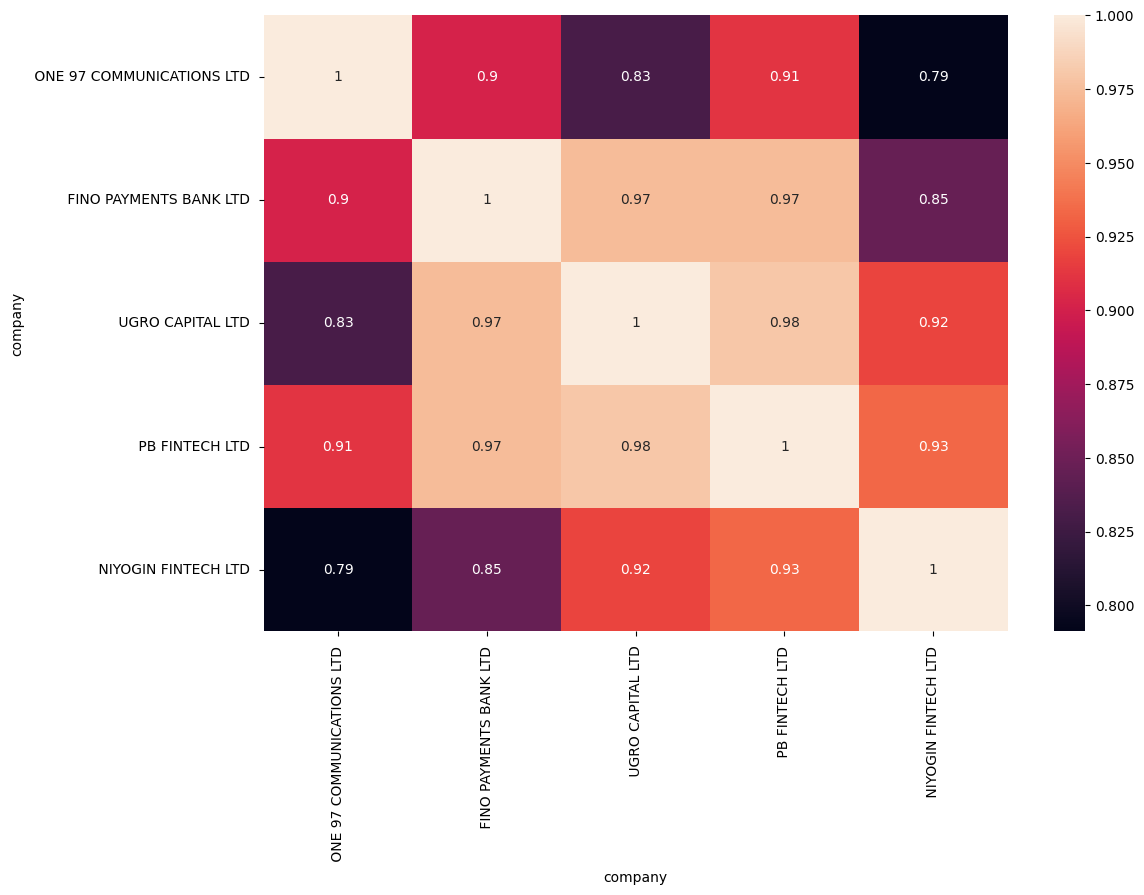

In [66]:
sns.heatmap(sales_df.T.corr(),annot=True)

<Axes: xlabel='company', ylabel='company'>

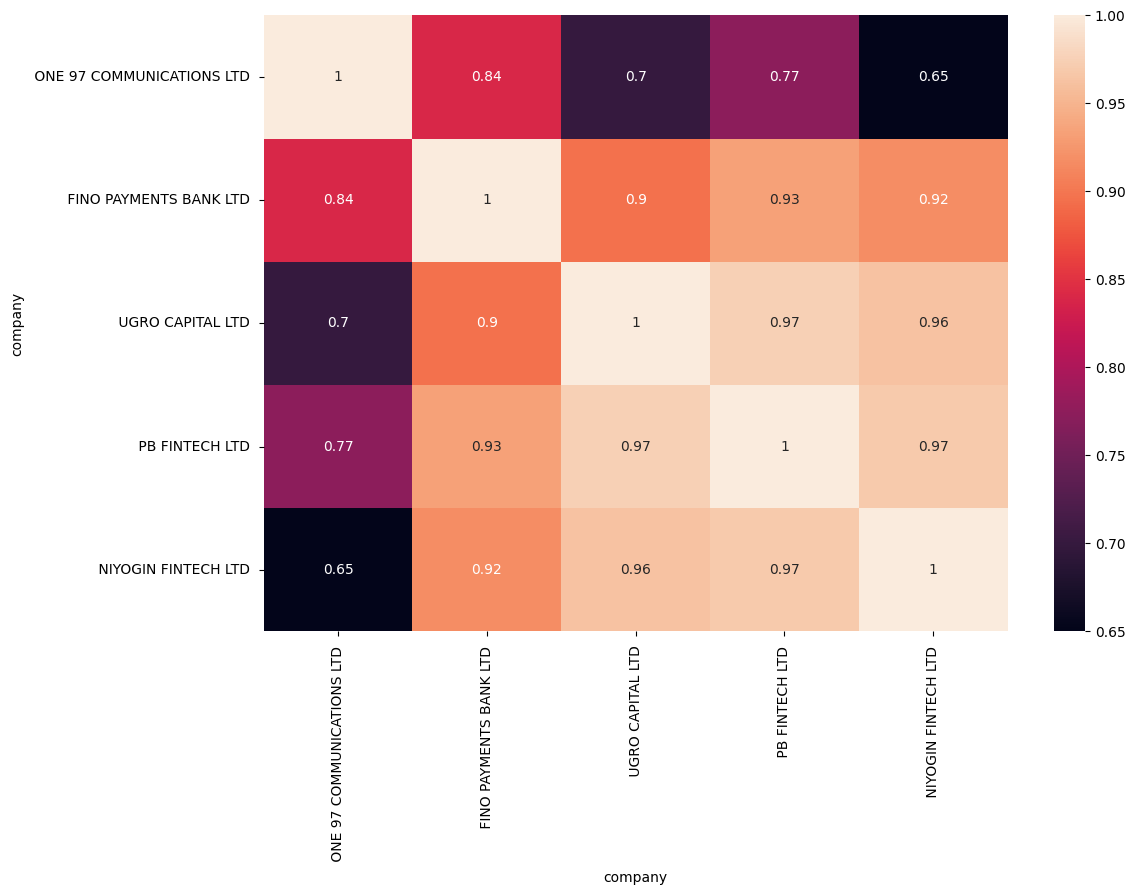

In [67]:
sns.heatmap(expenses_df.T.corr(),annot=True) 